In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
# encoder_df = pd.read_pickle("/work/aistwal/MMDS_MasterThesis/data/tau2019/tau2019_encoder_data/tau_2019_conv_autoencoder_200_25.pkl")
encoder_df = pd.read_pickle("/work/aistwal/MMDS_MasterThesis/data/tau2019/tau2019_encoder_data/tau_2019_conv_autoencoder_50_10.pkl")

In [3]:
encoder_df

,Label,Encoder Output
0,airport,"[979.00555, 1315.8931, 1674.273, 2150.1726, 97..."
1,bus,"[813.42163, 1309.7639, 1829.5267, 2345.505, 84..."
2,shopping_mall,"[1309.5095, 1663.2076, 2130.7615, 2628.9846, 1..."
3,street_pedestrian,"[1382.9443, 1703.7753, 2095.646, 2582.293, 143..."
4,street_pedestrian,"[1347.6736, 1669.3535, 2136.009, 2587.6548, 14..."
...,...,...
14395,tram,"[1617.7244, 2142.737, 2307.518, 2522.0857, 165..."
14396,tram,"[1557.2258, 2031.3154, 2378.7266, 2794.788, 15..."
14397,tram,"[746.95306, 1363.7922, 1751.8524, 2061.959, 86..."
14398,tram,"[1126.7748, 1709.415, 2173.319, 2466.2239, 110..."


In [4]:
encoder_df['Encoder Output'][0].size
# One encoded vector is of the size 40960

1600

In [6]:
labels = encoder_df["Label"]
np.unique(labels)

array(['airport', 'bus', 'metro', 'metro_station', 'park',
       'public_square', 'shopping_mall', 'street_pedestrian',
       'street_traffic', 'tram'], dtype=object)

In [9]:
# Convert DataFrame column with lists into a numpy matrix for t-SNE
data_matrix = np.stack(encoder_df['Encoder Output'].values)

In [10]:
data_matrix.shape

(14400, 1600)

In [39]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(np.stack(encoder_df['Encoder Output'].values))

encoder_df['pca-one'] = pca_result[:,0]
encoder_df['pca-two'] = pca_result[:,1] 
encoder_df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.7120509  0.05505481 0.02465628]


In [41]:
# First component is capturing 70% of the variation

In [42]:
import seaborn as sns

In [43]:
encoder_df_subset = encoder_df.sample(frac=0.7)

<Axes: xlabel='pca-one', ylabel='pca-two'>

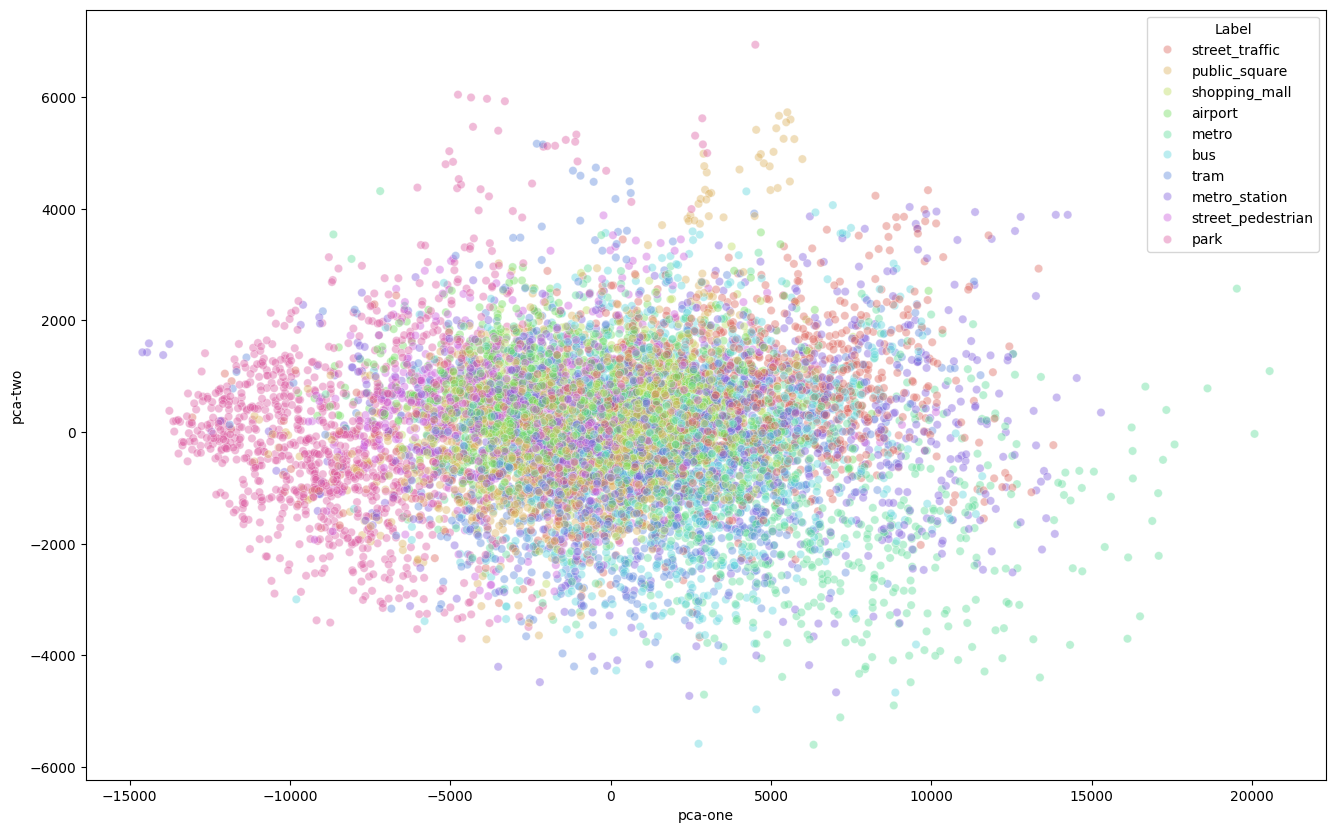

In [44]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="Label",
    palette=sns.color_palette("hls", 10),
    data= encoder_df_subset,
    legend="full",
    alpha=0.4
)


#randomly sampling 50% of the data

In [45]:
import time

data_matrix = np.stack(encoder_df_subset['Encoder Output'].values)

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_matrix)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10080 samples in 0.004s...
[t-SNE] Computed neighbors for 10080 samples in 0.942s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10080
[t-SNE] Computed conditional probabilities for sample 2000 / 10080
[t-SNE] Computed conditional probabilities for sample 3000 / 10080
[t-SNE] Computed conditional probabilities for sample 4000 / 10080
[t-SNE] Computed conditional probabilities for sample 5000 / 10080
[t-SNE] Computed conditional probabilities for sample 6000 / 10080
[t-SNE] Computed conditional probabilities for sample 7000 / 10080
[t-SNE] Computed conditional probabilities for sample 8000 / 10080
[t-SNE] Computed conditional probabilities for sample 9000 / 10080
[t-SNE] Computed conditional probabilities for sample 10000 / 10080
[t-SNE] Computed conditional probabilities for sample 10080 / 10080
[t-SNE] Mean sigma: 834.875969
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.901375
[t-SNE] 

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

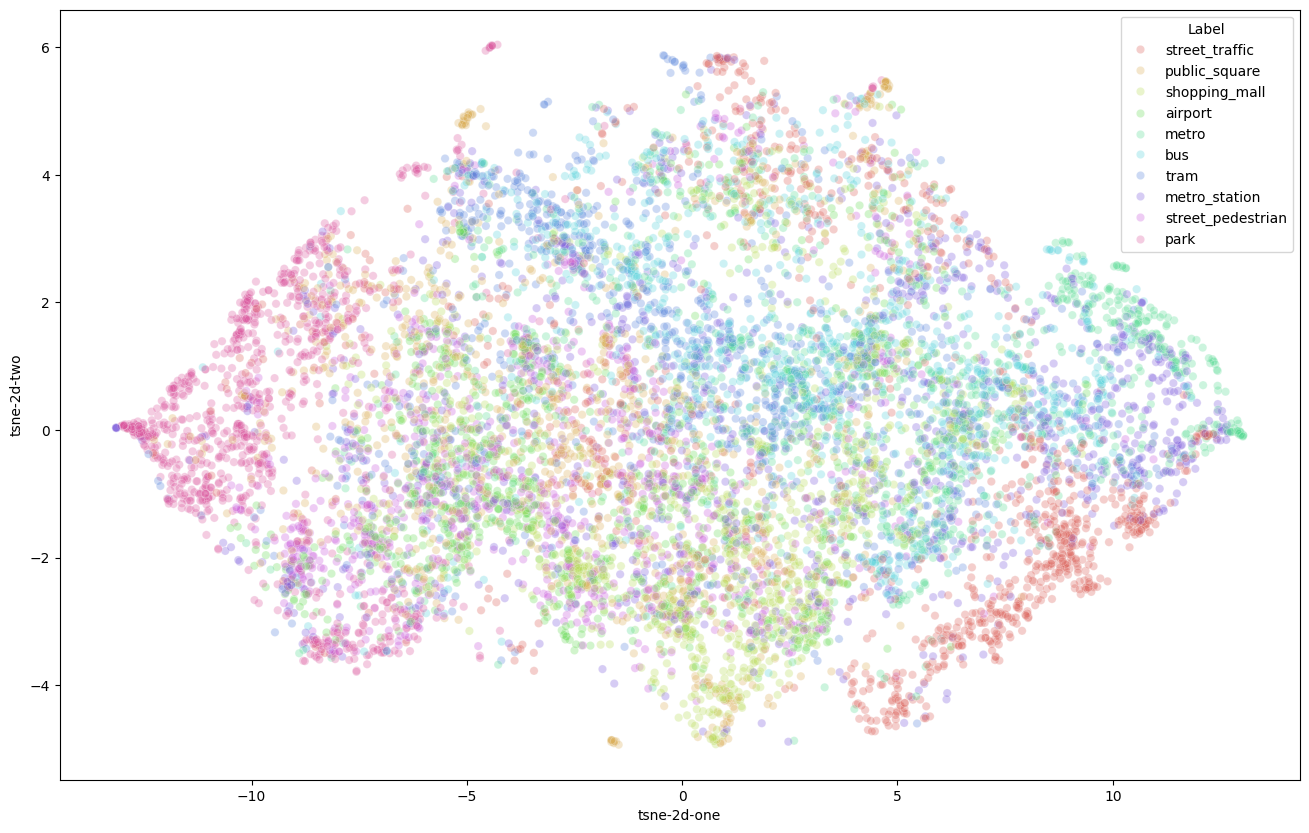

In [46]:
encoder_df_subset['tsne-2d-one'] = tsne_results[:,0]
encoder_df_subset['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Label",
    palette=sns.color_palette("hls", 10),
    data=encoder_df_subset,
    legend="full",
    alpha=0.3
)

In [48]:
encoder_df_subset.head()

,Label,Encoder Output,pca-one,pca-two,pca-three,tsne-2d-one,tsne-2d-two
10989,street_traffic,"[1328.6455, 1502.6188, 1767.4407, 2137.0486, 1...",862.446106,2337.369141,91.717758,1.628616,4.336385
9288,public_square,"[1144.8411, 1573.1338, 2105.4353, 2624.9854, 1...",-1193.986084,-1797.868042,456.351410,-1.428395,0.936816
13503,shopping_mall,"[1148.8363, 1562.4728, 1846.9028, 2189.5298, 1...",1406.899658,1240.880859,-50.735786,1.600190,1.045693
6172,airport,"[1168.6979, 1630.8386, 2118.9675, 2595.6648, 1...",-1024.249634,-679.143738,421.746704,-1.786304,-2.063420
7472,metro,"[1213.5793, 1771.5989, 2237.2856, 2599.653, 12...",-1587.190186,-1145.143311,-47.024227,-2.401061,2.729544


In [47]:
#COMPARING PCA AND TSNE SIDE BY SIDE

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

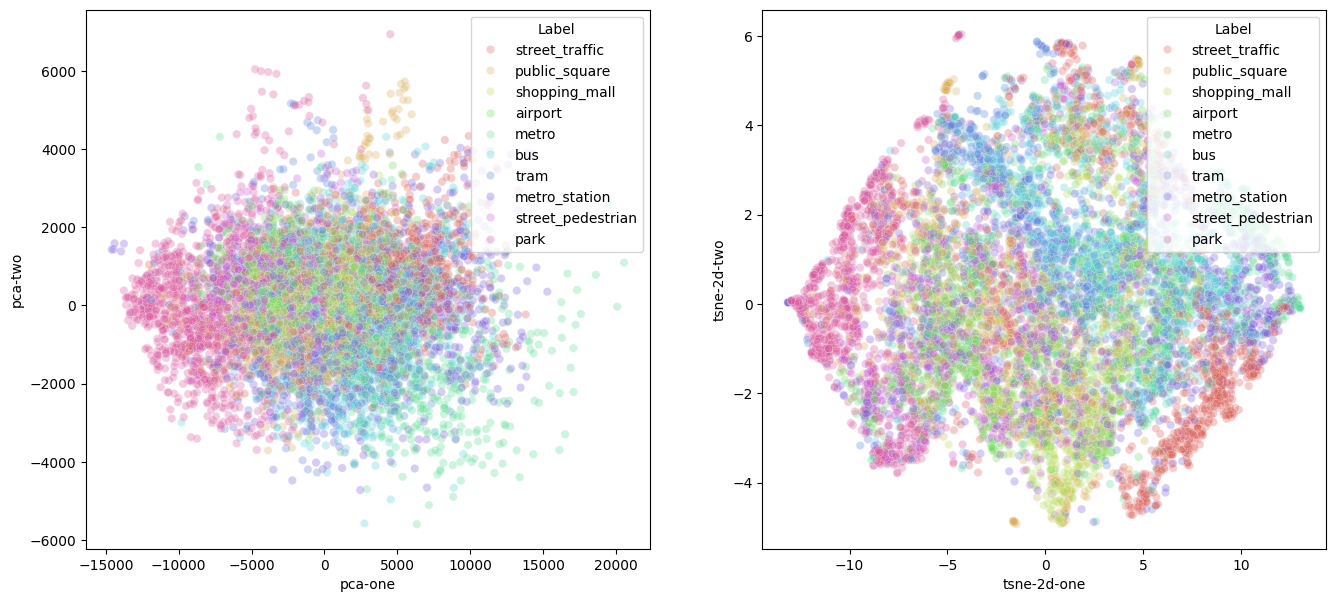

In [49]:
plt.figure(figsize=(16,7))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="Label",
    palette=sns.color_palette("hls", 10),
    data=encoder_df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Label",
    palette=sns.color_palette("hls", 10),
    data=encoder_df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [51]:
#now reduce the number of dimensions before feeding the data into the t-SNE algorithm. 
#Use PCA to reduce the dimensions to 50 then use that data for tsne
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_matrix)

print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.9085245728492737


In [ ]:
#The first 50 components hold around 90 percent of the total variation in the data.

In [52]:
time_start = time.time()

tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 8.065001726150513 seconds


<Axes: xlabel='tsne-pca50-one', ylabel='tsne-pca50-two'>

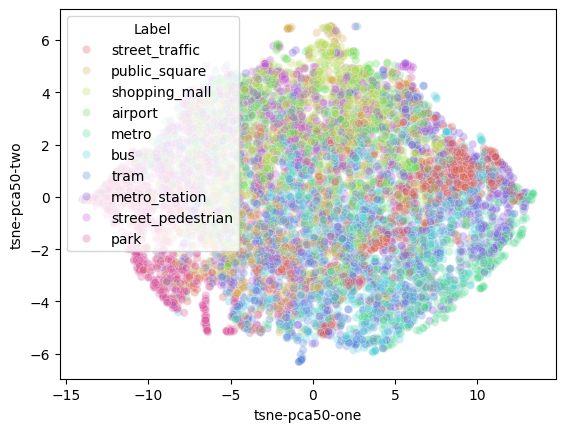

In [56]:
encoder_df_subset['tsne-pca50-one'] = tsne_pca_results[:,0]
encoder_df_subset['tsne-pca50-two'] = tsne_pca_results[:,1]

sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="Label",
    palette=sns.color_palette("hls", 10),
    data=encoder_df_subset,
    legend="full",
    alpha=0.3
)

##??? how to make sense of this

In [57]:
encoder_df_subset

,Label,Encoder Output,pca-one,pca-two,pca-three,tsne-2d-one,tsne-2d-two,tsne-pca50-one,tsne-pca50-two
10989,street_traffic,"[1328.6455, 1502.6188, 1767.4407, 2137.0486, 1...",862.446106,2337.369141,91.717758,1.628616,4.336385,1.852916,1.846204
9288,public_square,"[1144.8411, 1573.1338, 2105.4353, 2624.9854, 1...",-1193.986084,-1797.868042,456.351410,-1.428395,0.936816,-1.607980,-3.968927
13503,shopping_mall,"[1148.8363, 1562.4728, 1846.9028, 2189.5298, 1...",1406.899658,1240.880859,-50.735786,1.600190,1.045693,2.051208,2.535887
6172,airport,"[1168.6979, 1630.8386, 2118.9675, 2595.6648, 1...",-1024.249634,-679.143738,421.746704,-1.786304,-2.063420,-1.818344,2.030453
7472,metro,"[1213.5793, 1771.5989, 2237.2856, 2599.653, 12...",-1587.190186,-1145.143311,-47.024227,-2.401061,2.729544,-2.587835,-2.959508
...,...,...,...,...,...,...,...,...,...
12507,metro,"[1150.4215, 1549.3606, 1914.1808, 2306.7463, 1...",2541.435059,830.148438,-111.062790,4.163007,1.444410,3.746816,3.040375
13107,park,"[1327.0712, 1822.3363, 2326.0276, 2817.167, 13...",-3898.602783,-2197.332520,357.276550,-5.225086,4.376700,-4.759725,-4.024748
7033,metro,"[1048.738, 1606.8904, 1935.2233, 2317.3762, 10...",1382.589966,-104.623146,-197.647919,1.366655,1.401664,1.116781,-2.852094
12163,bus,"[1040.4375, 1646.1687, 1998.6299, 2350.6572, 1...",3351.615234,-1670.300903,-75.900093,3.644999,0.033477,4.123679,-4.424942
